In [2]:
import sys
sys.path

['D:\\bio\\jupyter_code\\MERFISH',
 'D:\\anaconda\\envs\\paste\\python310.zip',
 'D:\\anaconda\\envs\\paste\\DLLs',
 'D:\\anaconda\\envs\\paste\\lib',
 'D:\\anaconda\\envs\\paste',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\Pythonwin']

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import paste as pst
import ot

In [4]:
sample_names = ["-0.04","-0.09","-0.14","-0.19","-0.24"]
input_dir = 'G:/dataset/MERFISH/input/'
output_dir = 'G:/dataset/MERFISH/output/PASTE/'
experiment_name = 'MERFISH'

# Load Slices

In [6]:
# slice_i = sc.read_h5ad(input_dir + '-0.04' + '.h5ad')
# print(slice_i)

# df = slice_i.obs[['x','y']]
# slice_i.obsm['spatial'] = df.values
    
# print(df.values)

AnnData object with n_obs × n_vars = 5488 × 155
    obs: 'orig.ident', 'nCount_MERFISH', 'nFeature_MERFISH', 'x', 'y', 'Cell_class', 'Neuron_cluster_ID', 'z', 'batch'
    var: 'features'
[[-3033.401378  2825.155877]
 [-3027.328655  2955.936449]
 [-3020.512953  2961.69671 ]
 ...
 [-1365.432026  4412.294335]
 [-1285.31887   4407.33702 ]
 [-1245.772262  4493.722471]]


In [8]:
# Assume that the coordinates of slices are named slice_name + "_coor.csv"
def load_slices(data_dir, slice_names = sample_names):
    slices = []  
    for slice_name in slice_names:
        print(slice_name)
        ### get anndata
        # slice_i = sc.read_visium(input_dir + slice_name)
        # slice_i.var_names_make_unique()
        # load by meta + coor
        slice_i = sc.read_h5ad(data_dir + slice_name + '.h5ad')
        df = slice_i.obs[['x','y']]
        slice_i.obsm['spatial'] = df.values
        
        ### Preprocess slices
        sc.pp.filter_genes(slice_i, min_counts = 15)
        sc.pp.filter_cells(slice_i, min_counts = 100)
        slices.append(slice_i)
    return slices

adata_list = load_slices(input_dir)

-0.04
-0.09
-0.14
-0.19
-0.24


In [9]:
for adata in adata_list:
    print(adata)

AnnData object with n_obs × n_vars = 5382 × 155
    obs: 'orig.ident', 'nCount_MERFISH', 'nFeature_MERFISH', 'x', 'y', 'Cell_class', 'Neuron_cluster_ID', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 5486 × 155
    obs: 'orig.ident', 'nCount_MERFISH', 'nFeature_MERFISH', 'x', 'y', 'Cell_class', 'Neuron_cluster_ID', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 5833 × 155
    obs: 'orig.ident', 'nCount_MERFISH', 'nFeature_MERFISH', 'x', 'y', 'Cell_class', 'Neuron_cluster_ID', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 5748 × 155
    obs: 'orig.ident', 'nCount_MERFISH', 'nFeature_MERFISH', 'x', 'y', 'Cell_class', 'Neuron_cluster_ID', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 5496 × 155
    obs: 'orig.ident', 'nCou

In [11]:
print(adata.obsm['spatial'])
print(adata.obsm['spatial'].dtype)
print(type(adata.obsm['spatial']))

[[-3749.176078 -3749.458442]
 [-3746.22621  -3742.259347]
 [-3742.897643 -3790.648737]
 ...
 [-2005.542176 -2318.036961]
 [-2121.481564 -2316.58132 ]
 [-1984.998774 -2115.708268]]
float64
<class 'numpy.ndarray'>


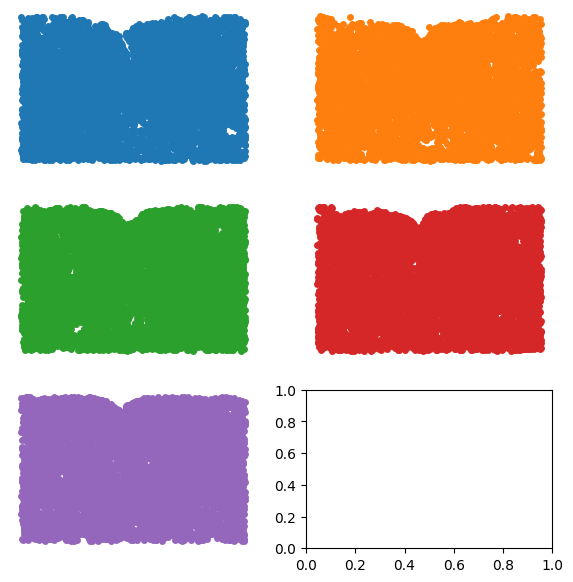

In [12]:
import seaborn as sns
slice_colors = sns.color_palette(n_colors = 6).as_hex()

fig, axs = plt.subplots(3, 2,figsize=(7,7))
i = 0
for adata in adata_list:
    pst.plot_slice(adata,slice_colors[i],ax=axs[int(i/2),int(i%2)])
    i = i + 1
    
plt.show()

In [ ]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# # seaborn.color_palette(palette = None, n_colors = None, desat = None)

# current_palette = sns.color_palette(n_colors = 6)
# sns.palplot(current_palette)
# plt.show()
# print(sns.color_palette(n_colors = 6).as_hex())

# run PASTE

In [13]:
import time
start = time.time()

pis = []
for i in range(len(adata_list)-1):
    pi_temp = pst.pairwise_align(adata_list[i], adata_list[i+1], backend = ot.backend.TorchBackend(), use_gpu = True)
    pis.append(pi_temp)
    
print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


gpu is available, using gpu.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


gpu is available, using gpu.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


gpu is available, using gpu.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Runtime: 41.57312321662903


In [14]:
print(pis)

[array([[3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08],
       [3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08],
       [3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08],
       ...,
       [3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08],
       [3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08],
       [3.3868854e-08, 3.3868854e-08, 3.3868854e-08, ..., 3.3868854e-08,
        3.3868854e-08, 3.3868854e-08]], dtype=float32), array([[3.125016e-08, 3.125016e-08, 3.125016e-08, ..., 3.125016e-08,
        3.125016e-08, 3.125016e-08],
       [3.125016e-08, 3.125016e-08, 3.125016e-08, ..., 3.125016e-08,
        3.125016e-08, 3.125016e-08],
       [3.125016e-08, 3.125016e-08, 3.125016e-08, ..., 3.125016e-08,
        3.125016e

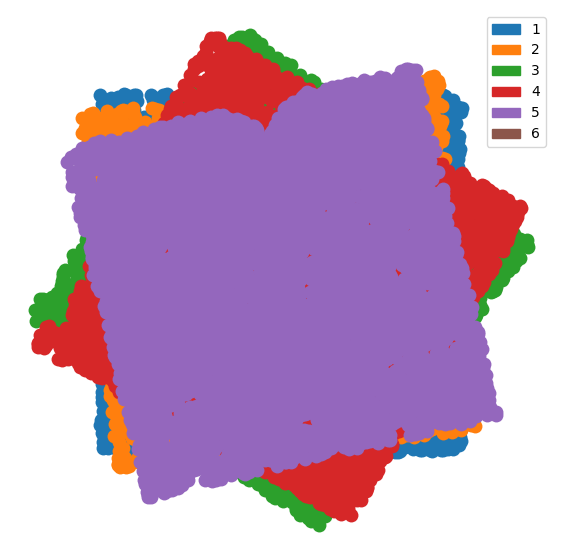

In [15]:
# To visualize the alignment you can stack the slices 
# according to the alignment pi


new_slices = pst.stack_slices_pairwise(adata_list, pis)

plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4'),mpatches.Patch(color=slice_colors[4], label='5'),mpatches.Patch(color=slice_colors[5], label='6')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

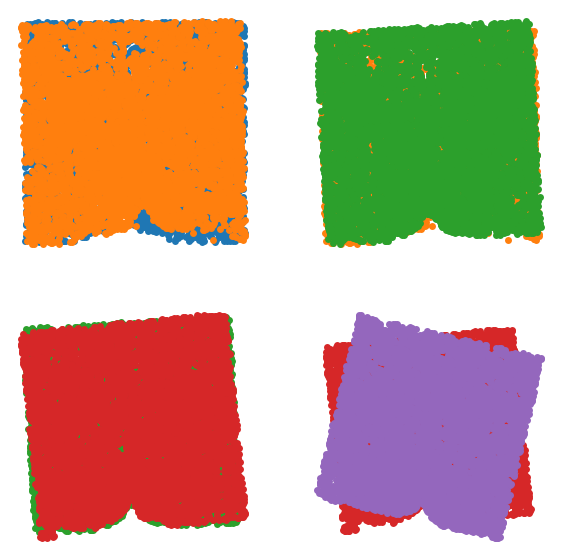

In [34]:
# slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
for i in range(len(adata_list)-1):
    pst.plot_slice(new_slices[i], slice_colors[i], ax=axs[int(i/2),int(i%2)])
    pst.plot_slice(new_slices[i+1], slice_colors[i+1], ax=axs[int(i/2),int(i%2)])
    
# fig.delaxes(axs[1,1])
plt.show()

In [17]:
type(adata_list[0].obsm['spatial'])

numpy.ndarray

In [18]:
for i in range(1, len(adata_list)):
    print(i)

1
2
3
4


In [20]:
# save coor
new_coord = new_slices[0].obsm['spatial']
cells = new_slices[0].obs_names
for i in range(1, len(adata_list)):
    new_coord = np.vstack((new_coord, new_slices[i].obsm['spatial']))
    cells = np.hstack((cells, new_slices[i].obs_names))

# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))

new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(output_dir + "paste_coord_" + experiment_name + ".csv")

## center slice mode

In [23]:
slices[0].X.todense()

matrix([[1.56916781e+01, 0.00000000e+00, 0.00000000e+00, ...,
         9.53597600e-03, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.42812700e+00, ...,
         0.00000000e+00, 1.95905460e-02, 8.45485550e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 8.84094400e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 7.27417600e-03, 5.30443800e-03],
        [0.00000000e+00, 6.27758605e-01, 3.13875768e+00, ...,
         0.00000000e+00, 1.73800100e-02, 2.95916220e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 4.20250400e-03, 8.65512600e-03]])

In [24]:
slices = adata_list

initial_slice = slices[0].copy()
lmbda = len(slices)*[1/len(slices)]

pst.filter_for_common_genes(slices)

b = []
for i in range(len(slices)):
    b.append(pst.match_spots_using_spatial_heuristic(slices[0].X.todense(), slices[i].X.todense()))

Filtered all slices for common genes. There are 155 common genes.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


In [25]:
type(slices[0].X.dtype)

numpy.dtype[float64]

In [26]:
start = time.time()
## Possible to pass in an initial pi (as keyword argument pis_init) 
## to improve performance, see Tutorial.ipynb notebook for more details.
# center_slice, pis = pst.center_align(initial_slice, slices, lmbda) 

# center_slice, pis = pst.center_align(initial_slice, slices, lmbda, random_seed = 5, backend = ot.backend.TorchBackend(), use_gpu = True)
center_slice, pis = pst.center_align(initial_slice, slices, lmbda, pis_init = b, backend = ot.backend.TorchBackend(), use_gpu = True) 

print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.
Filtered all slices for common genes. There are 155 common genes.
Iteration: 0
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  26285.749761512518
Difference: 26285.749761512518

Iteration: 1
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  26285.755170853015
Difference: 0.005409340497863013

Iteration: 2
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\paste\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  26285.75567488996
Difference: 0.000504036943311803

Runtime: 140.72304797172546


In [27]:
W = center_slice.uns['paste_W']
H = center_slice.uns['paste_H']

In [28]:
print(type(W))
print(type(H))
print(W)
print(H)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1.72376581e-01 6.55896391e+00 2.07976852e-02 ... 1.31727646e+00
  5.18967381e-10 2.88976260e-03]
 [7.44360791e-02 1.35069401e-02 8.98650563e-04 ... 8.23490150e-02
  7.76700100e-02 2.74028231e-01]
 [7.94244159e-02 7.61178598e-03 2.59281450e-38 ... 1.94087926e-02
  5.44602950e-01 1.17783684e-01]
 ...
 [1.00653830e-50 1.31704434e-02 1.16380097e-01 ... 6.77069932e-03
  1.43470939e-01 1.00496668e-01]
 [1.80572376e-02 5.27626507e-02 6.39879640e-02 ... 1.78504886e-02
  8.68340625e-02 4.13267479e-02]
 [3.68922634e-49 6.23239134e-02 3.23376222e-02 ... 2.26649613e-06
  5.22723357e-01 5.45029088e-02]]
[[1.42885101e-03 5.33731661e-03 1.74529164e-01 ... 3.21258314e-03
  1.70622420e-03 1.85719542e-04]
 [5.03737293e-01 6.04900803e-01 9.04362456e-02 ... 3.84905984e-03
  8.31694019e-04 9.03749007e-05]
 [5.22355710e-03 7.28163540e-03 4.45205715e-02 ... 3.08927876e-03
  7.64767801e-04 4.47561860e-04]
 ...
 [1.37398204e-02 1.46496698e-02 4.78500391e-02 ...

In [29]:
print(W.shape)
print(H.shape)

(5382, 15)
(15, 155)


In [30]:
np.savetxt(output_dir + experiment_name +"_W.csv", W, delimiter=",")
np.savetxt(output_dir + experiment_name +"_H.csv", H, delimiter=",")

In [31]:
center, new_slices = pst.stack_slices_center(center_slice, slices, pis)

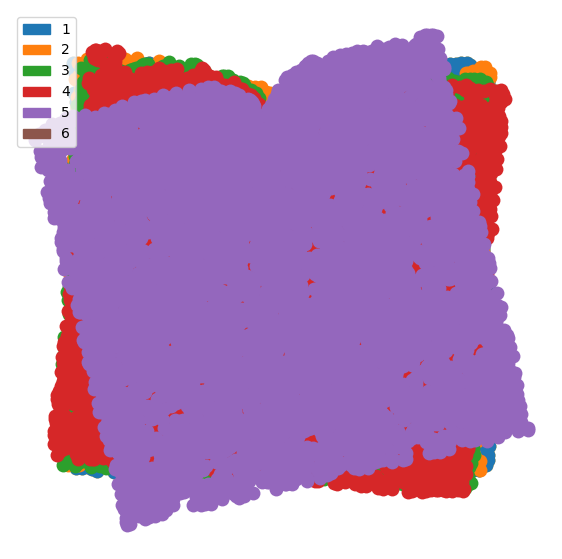

In [32]:
center_color = 'orange'
# slices_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
slice_colors = sns.color_palette(n_colors = 6).as_hex()

plt.figure(figsize=(7,7))
pst.plot_slice(center,center_color,s=400)
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)

plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4'),mpatches.Patch(color=slice_colors[4], label='5'),mpatches.Patch(color=slice_colors[5], label='6')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

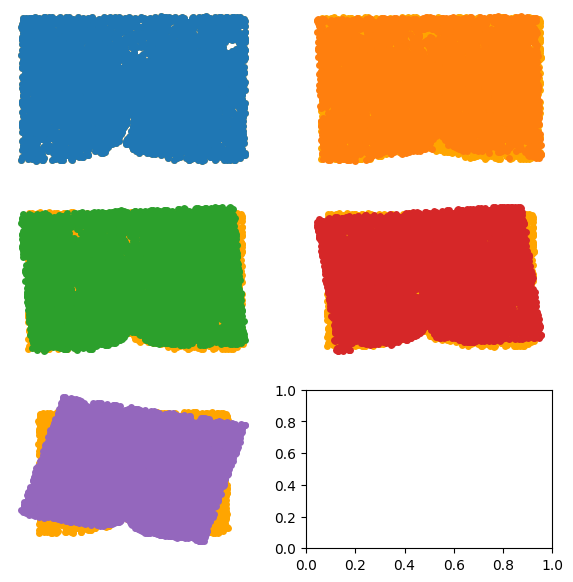

In [33]:
center_color = 'orange'
# slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(3, 2,figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(center,center_color,ax=axs[int(i/2),int(i%2)])
    pst.plot_slice(new_slices[i],slice_colors[i],ax=axs[int(i/2),int(i%2)])
plt.show()